# Исследование объявлений о продаже квартир

В проекте используются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Открытие файла с данными и изучение общей информации. 

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_a

### Вывод

В исходной таблице много пропущенных значений. Таже необходимо поменять тип данных для некоторых столбцов, например, для last_price

### Шаг 2. Предобработка данных

In [ ]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['floors_total'] = df['floors_total'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

Заменил пропущенные значения. Значения столбца 'ceiling_height' заменил на медиану, чтобы пропущенные значения стали приближены к реальным.

В столбце 'balcony' заменил пропущенные значения на ноль, поскольку можно предположить, что если пользователь не указал балкон, то его нет.

В столбце 'is_apartment' заменил пропущенные значения на False, пользуясь той же логикой, что и с балконами.

В столбце 'floors_total' заменил пропущенные значения на ноль для того, чтобы можно было производить операции над столбцом. В результатах исследования этот столбец напрямую не играет роли, поэтому не стал искать более умный способ заполнить пропуски.


In [ ]:
df['last_price'] = df['last_price'].astype('int64')
df['floors_total'] = df['floors_total'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

Заменил дробный тип данных на целочисленный, для удобства работы с таблицей.

### Шаг 3. Посчитайте и добавьте в таблицу

In [ ]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

Добавил цену за квадратный метр.

In [ ]:
df['weekday'] = df['first_day_exposition'].dt.weekday

line = -1
for element in df['weekday']:
    line += 1
    if element == 0:
        df['weekday'][line] = 'Понедельник'
    elif element == 1:
        df['weekday'][line] = 'Вторник'
    elif element == 2:
        df['weekday'][line] = 'Среда'
    elif element == 3:
        df['weekday'][line] = 'Четверг'
    elif element == 4:
        df['weekday'][line] = 'Пятница'
    elif element == 5:
        df['weekday'][line] = 'Суббота'
    
    else:
        df['weekday'][line] = 'Воскресенье'


Добавил столбец с дными недели, в который было выставленно объявление. Переименовал цифровые обозначения для удобства чтения.

In [ ]:
line = -1
df['apartment_floor'] = 0
for element in df['floor']:
    line += 1
    if element == 1:
        df['apartment_floor'][line] = '0' #Первый
    elif element == df['floors_total'][line]:
        df['apartment_floor'][line] = '1' #Последний
    else:
        df['apartment_floor'][line] = '2' #Другой

In [ ]:
df['living/total_area'] = df['living_area'] / df['total_area']

Добавил столбец соотношения жилой площади к общей.

In [ ]:
df['kitchen/total_area'] = df['kitchen_area'] / df['total_area']

Добавил столбец соотношения площади кухни к общей площади.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

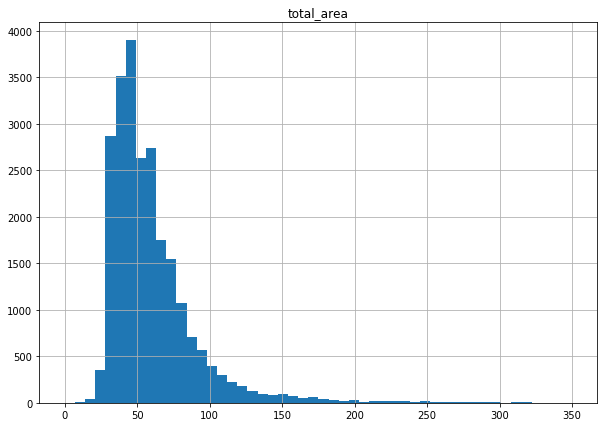

In [ ]:
df['total_area'].hist(bins = 50, range = (0, 350), figsize=(10,7))
plt.title('total_area')
plt.show()

Была построена гистограмма для столбца 'total_area'. Видно, что больше всего продают квартиры с общей площадью 20-60 квадратных метра.

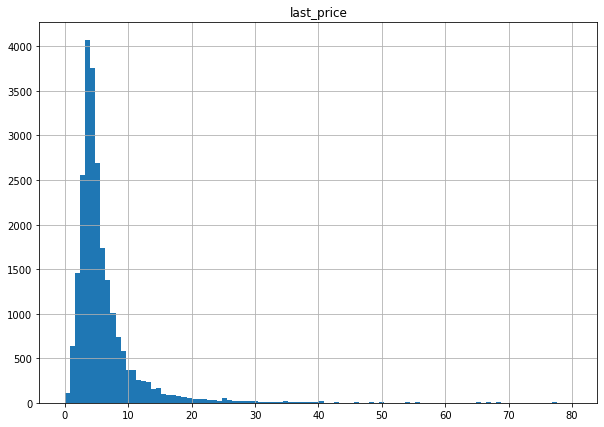

In [ ]:
(df['last_price']/1000000).hist(bins = 100, range = (0, 80), figsize=(10,7))
plt.title('last_price')
plt.show()

Была построена гистограмма для столбца 'last_price'. Больше всего продают квартиры стоимостью 3-6 миллионов рублей.

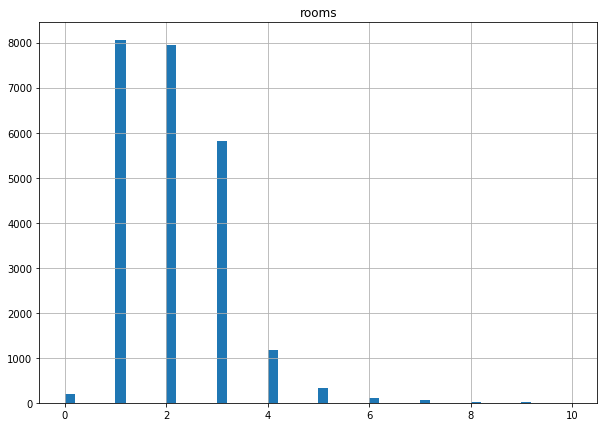

In [ ]:
df['rooms'].hist(bins = 50, range = (0, 10), figsize=(10,7))
plt.title('rooms')
plt.show()

Была построена гистограмма для столбца 'rooms'. В больше продаваемых квартиры 1-3 комнаты.

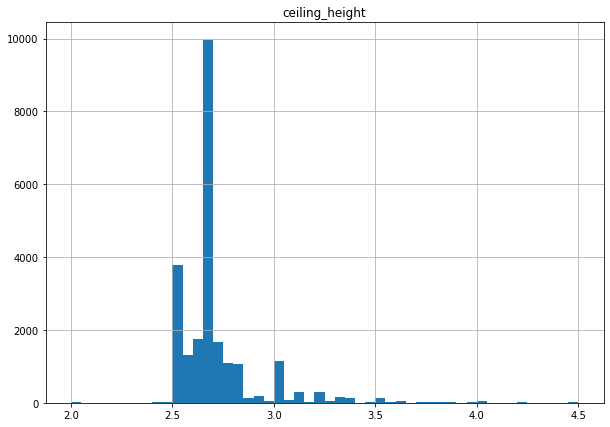

In [ ]:
df['ceiling_height'].hist(bins = 50, range = (2, 4.5), figsize=(10,7))
plt.title('ceiling_height')
plt.show()

Стало интересно сравнить гистограмму с ручным введением границ и с автоматически подбираемым.

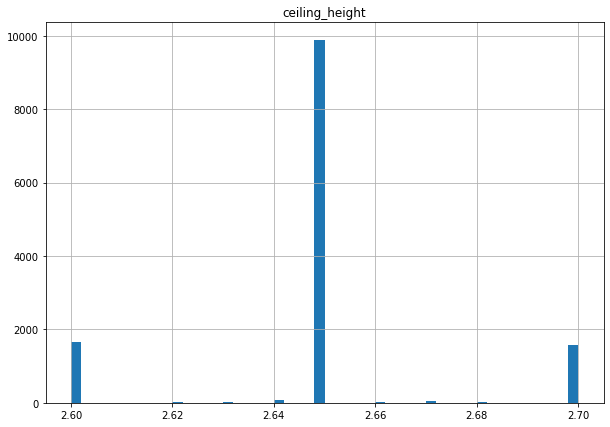

In [ ]:
df['ceiling_height'].hist(bins = 50, range = (np.percentile(df['ceiling_height'], 25), np.percentile(df['ceiling_height'], 75)), figsize=(10,7))
plt.title('ceiling_height')
plt.show()

Была построена гистограмма для столбца 'ceiling_height'. Чаще всего в квартирах высота потолка составляет 2,6 метра.

In [ ]:
q75 = np.percentile(df['ceiling_height'], 75)
q25 = np.percentile(df['ceiling_height'], 25)
iqr = q75 - q25
low_range = (q1 - 1.5 * iqr)
high_range = (q3 + 1.5 * iqr)

Среднее:  ceiling_height    2.724358
dtype: float64
Медиана:  ceiling_height    2.65
dtype: float64


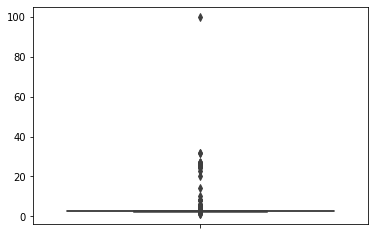

      ceiling_height
0.25            2.60
0.50            2.65
0.75            2.70


Среднее:  days_exposition    180.888634
dtype: float64
Медиана:  days_exposition    95.0
dtype: float64


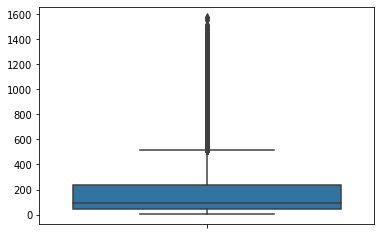

      days_exposition
0.25             45.0
0.50             95.0
0.75            232.0




In [ ]:
for i in range(5, 22, 16):
    print('Среднее: ', df.iloc[:, [i]].mean())
    print('Медиана: ', df.iloc[:, [i]].median())
    sns.boxplot(y = df.iloc[:, [i]])
    plt.show()
    print(df.iloc[:, [i]].quantile([0.25,0.5,0.75]))
    print()
    print()

Была построена диаграмма размаха столбца 'days_exposition'. Видно, что, если продажа прошла более чем за 232 дня - можно сказать, что это долго. Если меньше 45 дней - очень быстро.

In [ ]:
print('Кол-во квартир с потолками меньше 2.6м: ', len(df.query('ceiling_height < 2.60')))
print('Кол-во квартир с потолками выше 2.7м: ', len(df.query('ceiling_height > 2.70')))
print('Кол-во квартир с потолками от 2.6 до 2.7м: ', len(df.query('2.70 > ceiling_height > 2.60')))
df = df.query('ceiling_height < 10')
df.reset_index(drop = True)

Кол-во квартир с потолками меньше 2.6м:  5150
Кол-во квартир с потолками выше 2.7м:  5267
Кол-во квартир с потолками от 2.6 до 2.7м:  10062


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,apartment_floor,living/total_area,kitchen/total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,Четверг,2,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,Вторник,0,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,Четверг,2,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,Пятница,2,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,Вторник,2,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,Вторник,2,0.547792,0.103356
23670,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.372881,Понедельник,2,0.644068,0.144068
23671,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.710758,Воскресенье,0,0.523810,NaN
23672,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,Вторник,2,NaN,0.303583


Поскольку в исходной таблице значения столбца 'ceiling_height' заметно отличаются, было решено убрать значения более 10 метров. На мой взгляд, значения более 10 метров - ошибка при заполнении формы или сбой при обработке данных.

In [ ]:
df['last_price'].corr(df['total_area'])

0.6537728792960087

Наблюдается сильная зависимость цены недвижимости от общей площади.

In [ ]:
df['last_price'].corr(df['rooms'])

0.3634846768212834

Зависимость цены недвижимости от числа комнат небольшая. Нельзя сказать, что эти данные взаимосвязанны.

In [ ]:
df['last_price'].corr(df['cityCenters_nearest'])

-0.2068091767051723

Зависимость цены от близости к центру города не наблюдается. Но скорее всего это связанно с недостатком данных в таблице.

In [ ]:
df['last_price'].corr(df['apartment_floor'])

0.041348893134033456

Зависимости цены от этажа также не налюдается.

In [ ]:
df['years'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['last_price'].corr(df['years'])

-0.04310946500691873

Зависимости стоимости стоимости от года, в который была выставленна квартира, не наблюдается.

In [ ]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['last_price'].corr(df['month'])

0.002817221803403379

Зависимости стоимости стоимости от месяца, в который была выставленна квартира, не наблюдается.

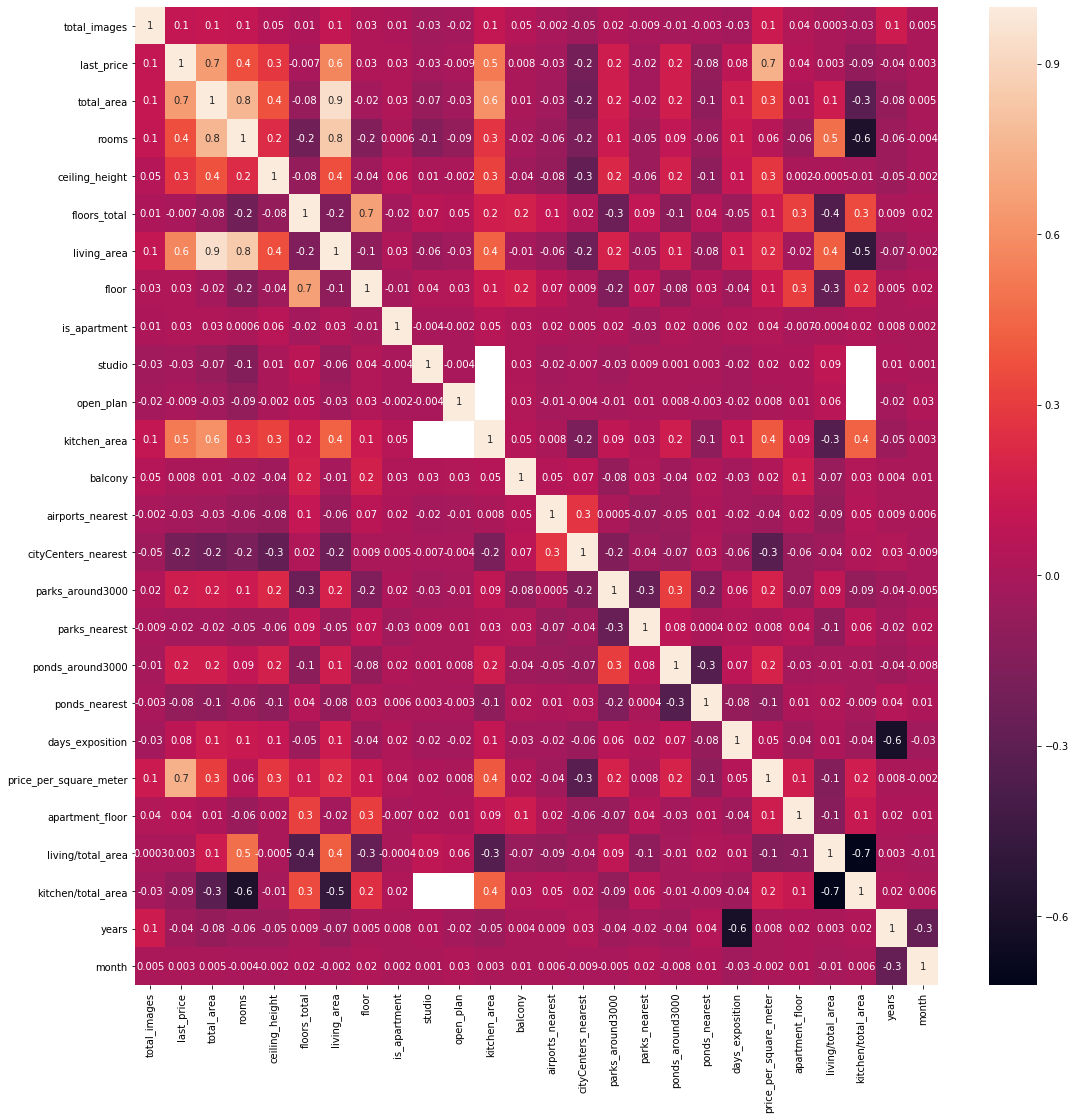

In [ ]:
plt.figure(figsize=(18, 18))
map_1 = sns.heatmap(df.corr(), annot = True, fmt = '.1g')
map_1

Больше никаких зависимостей не наблюдается.

In [ ]:
locality_table = df['locality_name'].value_counts().head(10)
locality_table

Санкт-Петербург      15706
посёлок Мурино         520
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Вывел 10 самых частовстречаемых в таблице населенных пунктов.

In [ ]:
top_10_locality = df.query('locality_name == "Санкт-Петербург" or locality_name == "посёлок Мурино" or locality_name == "посёлок Шушары" or locality_name == "Всеволожск" or locality_name == "Пушкин" or locality_name == "Колпино" or locality_name == "посёлок Парголово" or locality_name == "Гатчина" or locality_name == "деревня Кудрово" or locality_name == "Выборг"')
top_10_locality.groupby('locality_name')['price_per_square_meter'].mean().sort_values(ascending = False)

locality_name
Санкт-Петербург      114827.944282
Пушкин               103125.819291
деревня Кудрово       92473.547576
посёлок Парголово     90175.913458
посёлок Мурино        85725.241381
посёлок Шушары        78677.364217
Колпино               75424.579098
Гатчина               68757.678644
Всеволожск            68654.473986
Выборг                58141.909153
Name: price_per_square_meter, dtype: float64

Для вышеупомянутых городов показана средняя цена квадратного метра.

In [ ]:
df_3 = df[['locality_name', 'cityCenters_nearest', 'last_price']]
dict_2 = ['Санкт-Петербург']
df_3 = df_3[df_3['locality_name'].isin(dict_2)]
df_3 = df_3.drop(['locality_name'], axis = 1)
df_3['cityCenters_nearest'] = df_3['cityCenters_nearest'] / 1000
df_3['cityCenters_nearest'] = df_3.cityCenters_nearest.round(0)
df_3 = df_3.groupby(['cityCenters_nearest'], as_index = False) \
    .aggregate({'last_price': 'mean'}) \
    .rename(columns = {'last_price': 'mean_last_price'}) \
    .sort_values(['mean_last_price'], ascending = False) 
df_3['mean_last_price'] = df_3['mean_last_price'] / 1000000
df_3 = df_3.rename(columns = {'mean_last_price': 'mean_last_price_mln'}).sort_values(by = 'cityCenters_nearest', ascending = True).reset_index(drop = True)
df_3

,cityCenters_nearest,mean_last_price_mln
0,0.0,31.449116
1,1.0,21.206721
2,2.0,17.788320
3,3.0,11.135540
4,4.0,13.309091
5,5.0,14.499121
6,6.0,15.338418
7,7.0,14.775153
8,8.0,9.969961
9,9.0,6.950659


Была составлена таблица удаленности квартиры от цента и ее средней стоимости(в миллионах)

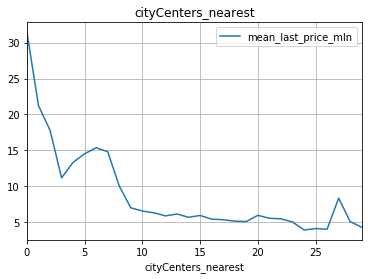

In [ ]:
df_3.plot(x='cityCenters_nearest', y='mean_last_price_mln', grid=True, title = 'cityCenters_nearest')

На основе вышеупомянутой таблицы был составлен график, на котором виднен скачок цен на отметке 8 ~~3~~ км. Можно предположить, что радиус центра города - 8 ~~3~~ км.

In [ ]:
central_flats = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 8000')
central_flats.head()
print('Средняя строимость недвижимости: ', central_flats['last_price'].median())
print('Средняя площадь недвижимости: ', central_flats['total_area'].median())
print('Среднее число комнат: ', central_flats['rooms'].median())
print('Средняя высота потолков: ', central_flats['ceiling_height'].median())


Средняя строимость недвижимости:  9000000.0
Средняя площадь недвижимости:  77.76
Среднее число комнат:  3.0
Средняя высота потолков:  2.8


Для квартир, находящихся в центре выведена информация о средней стоимости, площади, числе комнат, высоте потолков. Вместо взятия среднего значения была использована медиана. Это было сделано поскольку есть единичные квартиры, которые являются уникальными в некоторых из перечисленных параметров, поэтому, при подсчете среднего, полученное число может не отражать действительности.

In [ ]:
central_flats['last_price'].corr(df['rooms'])

0.3333106772403411

Зависимоть цены от числа комнат для квартир, находящихся в центре, не наблюдается.

In [ ]:
central_flats['last_price'].corr(df['floor'])

0.12571696341314412

Зависимоть цены от этажа для квартир, находящихся в центре, не наблюдается.

In [ ]:
central_flats['last_price'].corr(df['cityCenters_nearest'])

-0.04840674977449365

Зависимоть цены от близости к центу для квартир, находящихся в центре, не наблюдается. Возможно, связано с недостатком данных.

In [ ]:
central_flats['last_price'].corr(df['total_area'])

0.6364118124758985

Наблюдается зависимость цены от общей площади.

In [ ]:
central_flats['last_price'].corr(df['month'])

-0.006142201550275655

Зависимости стоимости от месяца, в который была выставленна квартира, не наблюдается.

In [ ]:
central_flats['last_price'].corr(df['years'])

-0.04309766189342029

Зависимости стоимости от года, в который была выставленна квартира, не наблюдается.

**Общий вывод**

По результатам проделанной работы можно сказать, что основная зависимость наблюдается между ценой и общей площадью квартиры. Остальные показатели взаимосвязанны с ценой в меньшей степени. Данный вывод справделив как для квартир в центре города, так и для всех остальных квартир в исходной таблице.